In [343]:
import pandas as pd
# https://github.com/SohierDane/BigQuery_Helper
from bq_helper import BigQueryHelper
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Creating a BigQueryHelper object
active_project = 'bigquery-public-data'
dataset_name = 'github_repos'
service_account_json_key = 'key.json'
bq_assistant = BigQueryHelper(active_project, dataset_name, service_account_json_key)

In [3]:
# Listing tables

bq_assistant.list_tables()

['commits',
 'contents',
 'files',
 'languages',
 'licenses',
 'sample_commits',
 'sample_contents',
 'sample_files',
 'sample_repos']

In [4]:
# Inspecting table rows
bq_assistant.head("licenses", num_rows=10)

,repo_name,license
0,CharlotteNgs/NgsSim,artistic-2.0
1,ranjeethmahankali/SpacePlanning,artistic-2.0
2,eparedesb/Example2015,artistic-2.0
3,luiscotua/Proyecto-1,artistic-2.0
4,sanko/Finance-Robinhood,artistic-2.0
5,bigthing33/LoginDemo,artistic-2.0
6,opencloset/OpenCloset-Share-Web,artistic-2.0
7,egamboa/satelites-vagando,artistic-2.0
8,PeterMartini/net-ipmi-pp,artistic-2.0
9,daweking/ada-,artistic-2.0


In [5]:
# query conditions + limit
# SELECT 2000 commit messages from the commits table wich size bewteen 7 and 20 .
QUERY_LIMIT = """
        SELECT message
        FROM `bigquery-public-data.github_repos.commits`
        WHERE LENGTH(message) > 6 AND LENGTH(message) <= 20
        LIMIT 2000
        """

In [6]:
print(QUERY_LIMIT)


        SELECT message
        FROM `bigquery-public-data.github_repos.commits`
        WHERE LENGTH(message) > 6 AND LENGTH(message) <= 20
        LIMIT 2000
        


In [7]:
# query full scan
# SELECT 2000 commit messages from the commits table wich size bewteen 7 and 20 .
QUERY_FULL_SCAN = """
        SELECT message
        FROM `bigquery-public-data.github_repos.commits`
        """

In [8]:
print(QUERY_FULL_SCAN)


        SELECT message
        FROM `bigquery-public-data.github_repos.commits`
        


In [9]:
# Estimating query size (QUERY_LIMIT = 2000)
bq_assistant.estimate_query_size(QUERY_LIMIT)

18.36539830546826

In [10]:
# Estimating query size (QUERY_FULL_SCAN)
bq_assistant.estimate_query_size(QUERY_FULL_SCAN)

18.36539830546826

In [ ]:
# The same size for QUERY_LIMIT=2000 and QUERY_FULL_SCAN

In [11]:
# Executing queries safely
df = bq_assistant.query_to_pandas_safe(QUERY_LIMIT)

Query cancelled; estimated size of 18.36539830546826 exceeds limit of 1 GB


In [22]:
# Query licenses
QUERY_LICENSES = """
        SELECT license, COUNT(*) AS count_license
        FROM `bigquery-public-data.github_repos.licenses`
        GROUP BY license
        ORDER BY count_license DESC
        """

In [23]:
print(QUERY_LICENSES)


        SELECT license, COUNT(*) AS count_license
        FROM `bigquery-public-data.github_repos.licenses`
        GROUP BY license
        ORDER BY count_license DESC
        


In [24]:
# Estimate the size of my query to make sure it's not too huge
bq_assistant.estimate_query_size(QUERY_LICENSES)

0.02462900709360838

In [25]:
# Execute my query using query_to_pandas_safe to get my results in a pandas dataframe
df = bq_assistant.query_to_pandas_safe(QUERY_LICENSES)

In [26]:
# Explore the head of results
print('Size of dataframe: {} Bytes'.format(int(df.memory_usage(index=True, deep=True).sum())))

Size of dataframe: 1175 Bytes


In [27]:
# Explore the results
df.head()

,license,count_license
0,mit,1729173
1,apache-2.0,498251
2,gpl-2.0,351693
3,gpl-3.0,348977
4,bsd-3-clause,161192


In [28]:
# Explore the shape of results
df.shape

(15, 2)

In [29]:
# Explore the whole result
df

,license,count_license
0,mit,1729173
1,apache-2.0,498251
2,gpl-2.0,351693
3,gpl-3.0,348977
4,bsd-3-clause,161192
5,bsd-2-clause,57770
6,unlicense,47296
7,agpl-3.0,42595
8,lgpl-3.0,40484
9,cc0-1.0,27607


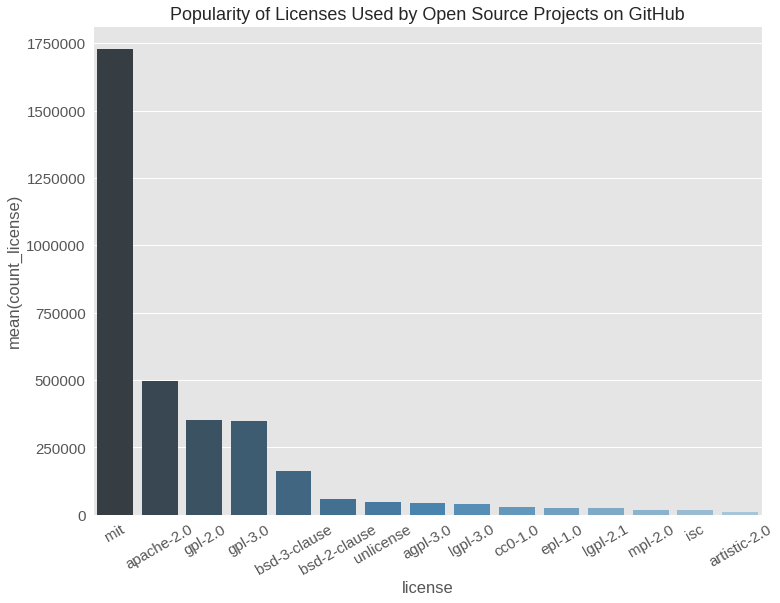

In [30]:
# Visualize the license results
plt.style.use('ggplot')

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

f, g = plt.subplots(figsize=(12, 9))
g = sns.barplot(x="license", y="count_license", data=df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title("Popularity of Licenses Used by Open Source Projects on GitHub")
plt.show(g)

In [152]:
# Query languages
QUERY_LANGUAGES = """
        SELECT 
        repo_name AS repoName,
        (SELECT COUNT(*) FROM UNNEST(language)) AS numberOfLanguage
        FROM `bigquery-public-data.github_repos.languages`
        GROUP BY repoName, numberOfLanguage
        ORDER BY numberOfLanguage DESC
        LIMIT 10
        """

In [153]:
print(QUERY_LANGUAGES)


        SELECT 
        repo_name AS repoName,
        (SELECT COUNT(*) FROM UNNEST(language)) AS numberOfLanguage
        FROM `bigquery-public-data.github_repos.languages`
        GROUP BY repoName, numberOfLanguage
        ORDER BY numberOfLanguage DESC
        LIMIT 10
        


In [154]:
# Estimate the size of my query to make sure it's not too huge
bq_assistant.estimate_query_size(QUERY_LANGUAGES)

0.07835182640701532

In [155]:
# Execute my query using query_to_pandas_safe to get my results in a pandas dataframe
df = bq_assistant.query_to_pandas_safe(QUERY_LANGUAGES)

In [157]:
df

,repoName,numberOfLanguage
0,polyrabbit/polyglot,216
1,nzavagli/UnrealPy,159
2,mollstam/UnrealPy,159
3,aswinpj/Pygments,154
4,objcio/pygments,153
5,sagangwee/sagangwee.github.io,149
6,remotemethod/hello-world,124
7,zmughal/pygments-mirror,122
8,willemneal/Docky,121
9,dscorbett/pygments,120


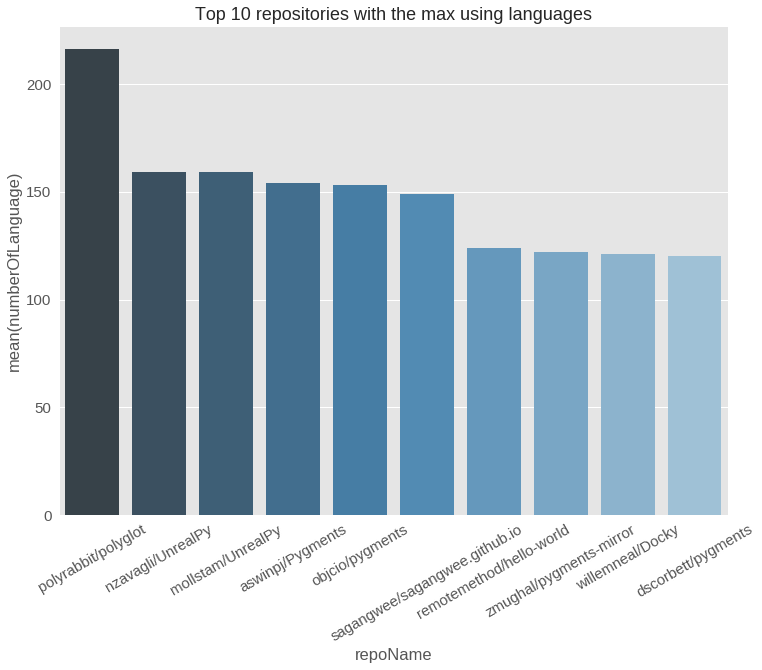

In [158]:
# Visualize the language results
plt.style.use('ggplot')

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

f, g = plt.subplots(figsize=(12, 9))
g = sns.barplot(x="repoName", y="numberOfLanguage", data=df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title("Top 10 repositories with the max using languages")
plt.show(g)


In [324]:
# Query languages
QUERY_LANGUAGES = """
        SELECT
          repoName,
          languageName
        FROM (
          SELECT
            repo_name AS repoName,
            ARRAY(SELECT name FROM UNNEST(language)) AS languageName
          FROM
            `bigquery-public-data.github_repos.languages`)
        WHERE ARRAY_LENGTH(languageName) > 0
        ORDER BY ARRAY_LENGTH(languageName) DESC
        LIMIT 10
        """

In [325]:
print(QUERY_LANGUAGES)


        SELECT
          repoName,
          languageName.name_
        FROM (
          SELECT
            repo_name AS repoName,
            ARRAY(SELECT name AS name_ FROM UNNEST(language)) AS languageName
          FROM
            `bigquery-public-data.github_repos.languages`)
        WHERE ARRAY_LENGTH(languageName) > 0
        ORDER BY ARRAY_LENGTH(languageName) DESC
        LIMIT 10
        


In [374]:
# Estimate the size of my query to make sure it's not too huge
bq_assistant.estimate_query_size(QUERY_LANGUAGES)

0.056098160333931446

In [216]:
# Execute my query using query_to_pandas_safe to get my results in a pandas dataframe
df = bq_assistant.query_to_pandas_safe(QUERY_LANGUAGES)

In [217]:
df

,repoName,languageName
0,polyrabbit/polyglot,"[ABAP, AGS Script, AMPL, APL, ATS, Agda, Alloy..."
1,nzavagli/UnrealPy,"[APL, ASP, ActionScript, Ada, Agda, Alloy, Apa..."
2,mollstam/UnrealPy,"[APL, ASP, ActionScript, Ada, Agda, Alloy, Apa..."
3,aswinpj/Pygments,"[APL, ASP, ActionScript, Ada, Agda, Alloy, Apa..."
4,objcio/pygments,"[APL, ASP, ActionScript, Ada, Agda, Alloy, Apa..."
5,sagangwee/sagangwee.github.io,"[APL, ASP, ActionScript, Ada, Agda, Alloy, Apa..."
6,remotemethod/hello-world,"[ABAP, AGS Script, APL, ASP, ActionScript, Ada..."
7,zmughal/pygments-mirror,"[APL, ASP, ActionScript, Ada, Agda, Alloy, App..."
8,willemneal/Docky,"[APL, ASP, ActionScript, Ada, Agda, Alloy, App..."
9,dscorbett/pygments,"[APL, ASP, ActionScript, Ada, Agda, Alloy, App..."


In [376]:
# Query languages
QUERY_LANGUAGES = """
        SELECT
          COUNT(*) AS languageCount,
          language.name AS languageName
        FROM
          `bigquery-public-data.github_repos.languages`
        JOIN
          UNNEST(language) AS language
        GROUP BY languageName
        ORDER BY languageCount DESC
        LIMIT 10
        """

In [377]:
print(QUERY_LANGUAGES)


        SELECT
          COUNT(*) AS languageCount,
          language.name AS languageName
        FROM
          `bigquery-public-data.github_repos.languages`
        JOIN
          UNNEST(language) AS language
        GROUP BY languageName
        ORDER BY languageCount DESC
        LIMIT 10
        


In [378]:
# Estimate the size of my query to make sure it's not too huge
bq_assistant.estimate_query_size(QUERY_LANGUAGES)

0.056098160333931446

In [379]:
# Execute my query using query_to_pandas_safe to get my results in a pandas dataframe
df = bq_assistant.query_to_pandas_safe(QUERY_LANGUAGES)

In [380]:
df

,languageCount,languageName
0,1123911,JavaScript
1,837003,CSS
2,797718,HTML
3,652449,Shell
4,559428,Python
5,383535,Ruby
6,376549,Java
7,349087,PHP
8,302029,C
9,286761,C++


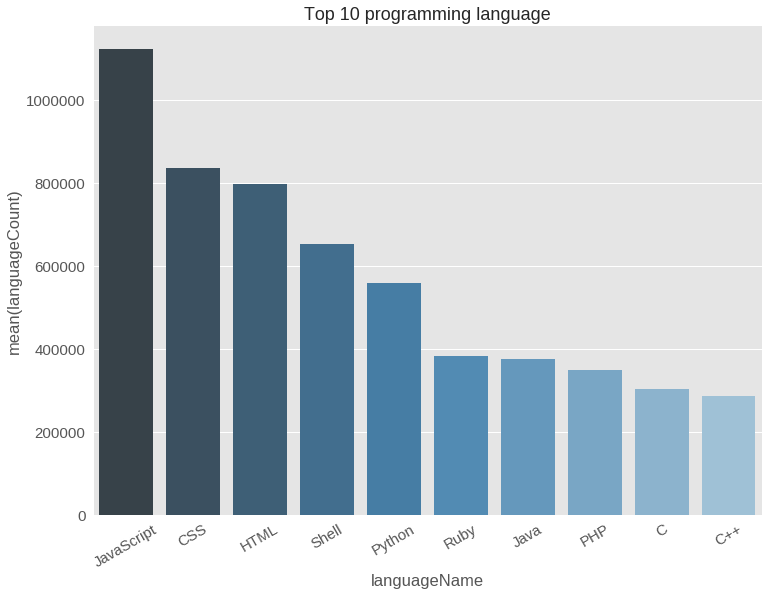

In [381]:
# Visualize the language results
plt.style.use('ggplot')

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

f, g = plt.subplots(figsize=(12, 9))
g = sns.barplot(x="languageName", y="languageCount", data=df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title("Top 10 programming language")
plt.show(g)